In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('data_credit_card.csv')
df.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [3]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [4]:
df[df['MINIMUM_PAYMENTS'].isnull()]

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
3     C10004  1666.670542           0.636364    1499.00           1499.00   
45    C10047  2242.311686           1.000000     437.00             97.00   
47    C10049  3910.111237           1.000000       0.00              0.00   
54    C10056     6.660517           0.636364     310.00              0.00   
55    C10057  1311.995984           1.000000    1283.90           1283.90   
...      ...          ...                ...        ...               ...   
8919  C19160    14.524779           0.333333     152.00            152.00   
8929  C19170   371.527312           0.333333       0.00              0.00   
8935  C19176   183.817004           1.000000     465.90              0.00   
8944  C19185   193.571722           0.833333    1012.73           1012.73   
8946  C19187    19.183215           1.000000     300.00              0.00   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
3                        0.0    205.788017             0.083333   
45                     340.0    184.648692             0.333333   
47                       0.0   1980.873201             0.000000   
54                     310.0      0.000000             0.666667   
55                       0.0      0.000000             0.250000   
...                      ...           ...                  ...   
8919                     0.0      0.000000             0.333333   
8929                     0.0   1465.407927             0.000000   
8935                   465.9      0.000000             1.000000   
8944                     0.0      0.000000             0.333333   
8946                   300.0      0.000000             1.000000   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
3                       0.083333                          0.000000   
45                      0.083333                          0.333333   
47                      0.000000                          0.000000   
54                      0.000000                          0.666667   
55                      0.250000                          0.000000   
...                          ...                               ...   
8919                    0.333333                          0.000000   
8929                    0.000000                          0.000000   
8935                    0.000000                          0.833333   
8944                    0.333333                          0.000000   
8946                    0.000000                          0.833333   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
3                   0.083333                 1              1        7500.0   
45                  0.166667                 2              5        2400.0   
47                  0.500000                 7              0        4200.0   
54                  0.000000                 0              8        1000.0   
55                  0.000000                 0              6        6000.0   
...                      ...               ...            ...           ...   
8919                0.000000                 0              2        1500.0   
8929                0.166667                 5              0        1500.0   
8935                0.000000                 0              6        1500.0   
8944                0.000000                 0              2        4000.0   
8946                0.000000                 0              6        1000.0   

        PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
3       0.000000               NaN               0.0      12  
45      0.000000               NaN               0.0      12  
47      0.000000               NaN               0.0      12  
54    417.016763               NaN               0.0      12  
55      0.000000               NaN               0.0      12  
...          ...               ...               ...     ...  
8919    0.000000               NaN          

In [5]:
df['MINIMUM_PAYMENTS'].median()

312.343947

In [6]:
df['MINIMUM_PAYMENTS'].fillna(value=312.343947,inplace=True)

In [7]:
df['MINIMUM_PAYMENTS'].isnull().sum()

0

In [8]:
df[df['CREDIT_LIMIT'].isnull()]

CUST_ID    BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
5203  C15349  18.400472           0.166667        0.0               0.0   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
5203                     0.0    186.853063                  0.0   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
5203                         0.0                               0.0   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
5203                0.166667                 1              0           NaN   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
5203  9.040017         14.418723               0.0       6

In [9]:
df['CREDIT_LIMIT'].median()

3000.0

In [10]:
df['CREDIT_LIMIT'].fillna(value=3000.0,inplace=True)

In [11]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8950 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS            

In [13]:
df_cust=df.copy(deep=True)
df.drop('CUST_ID',axis=1,inplace=True)

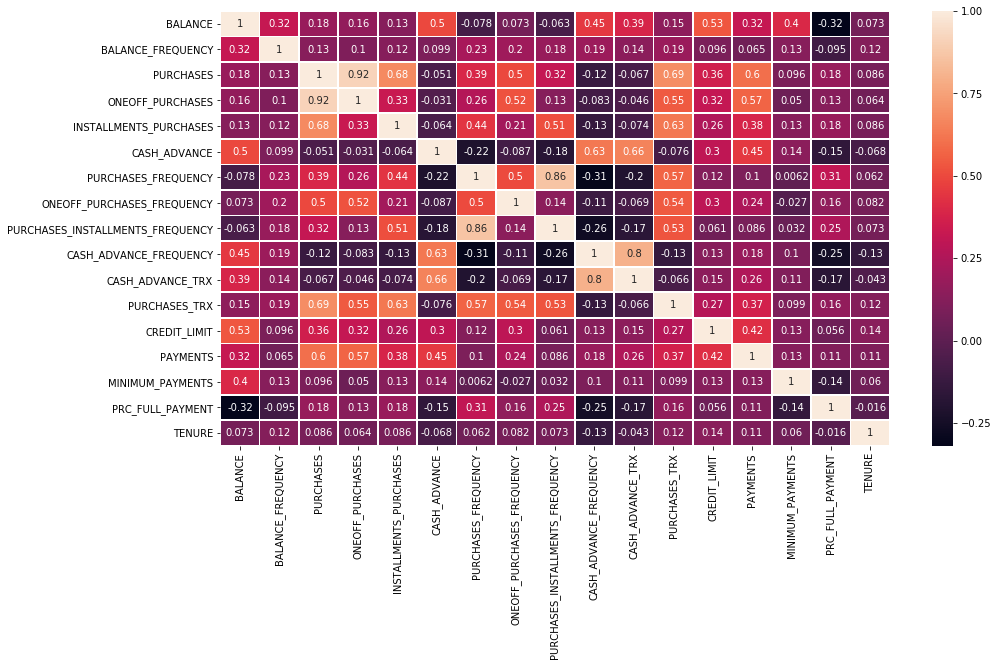

In [14]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True,linewidths=0.8)
b, t = plt.ylim() 
b += 0.5 
t -= 0.5 
plt.ylim(b, t) 
plt.show() 


In [15]:
from sklearn.cluster import KMeans

In [16]:
cluster_range=range(1,15)
wcss=[]
for num_clusters in cluster_range:
    kmeans=KMeans(num_clusters,n_init=10)
    kmeans.fit(df)
    labels=kmeans.labels_
    wcss.append(kmeans.inertia_)
clusters_df=pd.DataFrame({'num_clusters':cluster_range,'Inertia':wcss})
clusters_df

num_clusters       Inertia
0              1  3.931552e+11
1              2  2.793391e+11
2              3  2.328349e+11
3              4  2.067407e+11
4              5  1.817597e+11
5              6  1.617068e+11
6              7  1.452110e+11
7              8  1.328717e+11
8              9  1.242716e+11
9             10  1.165694e+11
10            11  1.091733e+11
11            12  1.032732e+11
12            13  9.805436e+10
13            14  9.438854e+10

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
sc=StandardScaler()

In [19]:
df_new=pd.DataFrame(sc.fit_transform(df),columns=df.columns)

In [20]:
df_new.head(2)

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0 -0.731989          -0.249434  -0.424900         -0.356934   
1  0.786961           0.134325  -0.469552         -0.356934   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0               -0.349079     -0.466786            -0.806490   
1               -0.454576      2.605605            -1.221758   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   -0.678661                         -0.707313   
1                   -0.678661                         -0.916995   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0               -0.675349         -0.476070      -0.511333     -0.960378   
1                0.573963          0.110074      -0.591796      0.688678   

   PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT   TENURE  
0 -0.528979           -0.3024         -0.525551  0.36068  
1  0.818642            0.0975          0.234227  0.36068

In [21]:
df_new.shape

(8950, 17)

In [22]:
df.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8950.000000   
mean                 0.135144          3.248827      14.709832   4494.282473   
std                  0.200121          6.824647      24.857649   3638.646702   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8950.000000       8950.000000  8950.000000  
mean    1733.143852        844.906767          0.153715    11.517318  
std     2895.063757       2332.792322          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        170.857654          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        788.713501          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

In [23]:
cluster_range=range(1,15)
wcss=[]
for num_clusters in cluster_range:
    kmeans=KMeans(num_clusters,n_init=10)
    kmeans.fit(df_new)
    labels=kmeans.labels_
    wcss.append(kmeans.inertia_)
clusters_df=pd.DataFrame({'num_clusters':cluster_range,'Inertia':wcss})
clusters_df

num_clusters        Inertia
0              1  152150.000000
1              2  127784.607149
2              3  111975.013482
3              4   99061.939842
4              5   91491.112532
5              6   84825.074214
6              7   79506.471643
7              8   74483.531292
8              9   69838.782314
9             10   66461.803610
10            11   63627.112627
11            12   61336.880695
12            13   59167.698499
13            14   57463.917032

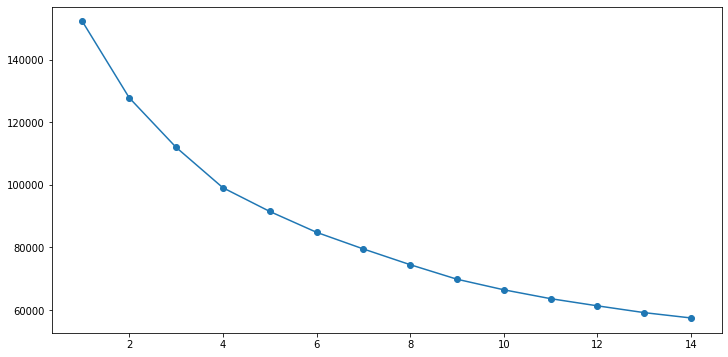

In [24]:
plt.figure(figsize=(12,6))
plt.plot(clusters_df.num_clusters,clusters_df.Inertia,marker='o')
plt.show()

In [25]:
kmeans=KMeans(n_clusters=6,n_init=15)
kmeans.fit(df_new)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=15, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [26]:
centroids=pd.DataFrame(kmeans.cluster_centers_,columns=df.columns)
centroids

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0 -0.698083          -2.121957  -0.312918         -0.230918   
1 -0.397003           0.308229  -0.067492         -0.245042   
2  1.591089           0.377143  -0.204461         -0.148999   
3 -0.010833           0.371475  -0.345165         -0.223656   
4  1.443847           0.414656   7.093187          6.244031   
5  0.137676           0.427207   0.926437          0.877387   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0               -0.315553     -0.307848            -0.559532   
1                0.290566     -0.365808             0.964918   
2               -0.209800      1.948040            -0.450300   
3               -0.405141     -0.081639            -0.826132   
4                5.297641      0.004274             1.081960   
5                0.578596     -0.309096             1.087856   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   -0.418507                         -0.464719   
1                   -0.376689                          1.139869   
2                   -0.184205                         -0.406892   
3                   -0.335426                         -0.770696   
4                    1.867817                          1.035380   
5                    1.838892                          0.542908   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0               -0.485688         -0.359177      -0.425619     -0.209336   
1               -0.463343         -0.358053       0.122175     -0.329661   
2                1.901055          1.854201      -0.244378      0.963765   
3                0.131510         -0.028177      -0.470533     -0.332968   
4               -0.299540         -0.116878       4.699112      2.171489   
5               -0.405671         -0.318458       1.184038      0.692438   

   PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT    TENURE  
0 -0.221225         -0.286047          0.262172 -0.164101  
1 -0.251576         -0.048363          0.341081 -0.025339  
2  0.775771          0.517887         -0.391279 -0.089372  
3 -0.261913         -0.027150         -0.451036 -0.009502  
4  4.847281          1.112018          0.830765  0.333341  
5  0.380207         -0.018707          0.435885  0.271440

In [27]:
kmeans.inertia_

84825.0742144269

In [28]:
kmeans.labels_

array([3, 2, 5, ..., 1, 3, 3])

In [29]:
df_labels=pd.DataFrame(kmeans.labels_,columns=list(['labels']))

df_labels['labels']=df_labels['labels'].astype('category')

In [30]:
df_k=pd.concat((df_new,df_labels),axis=1,sort=False)
df_k.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0 -0.731989          -0.249434  -0.424900         -0.356934   
1  0.786961           0.134325  -0.469552         -0.356934   
2  0.447135           0.518084  -0.107668          0.108889   
3  0.049099          -1.016953   0.232058          0.546189   
4 -0.358775           0.518084  -0.462063         -0.347294   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0               -0.349079     -0.466786            -0.806490   
1               -0.454576      2.605605            -1.221758   
2               -0.454576     -0.466786             1.269843   
3               -0.454576     -0.368653            -1.014125   
4               -0.454576     -0.466786            -1.014125   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   -0.678661                         -0.707313   
1                   -0.678661                         -0.916995   
2                    2.673451                         -0.916995   
3                   -0.399319                         -0.916995   
4                   -0.399319                         -0.916995   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0               -0.675349         -0.476070      -0.511333     -0.960378   
1                0.573963          0.110074      -0.591796      0.688678   
2               -0.675349         -0.476070      -0.109020      0.826100   
3               -0.258913         -0.329534      -0.551565      0.826100   
4               -0.675349         -0.476070      -0.551565     -0.905410   

   PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT   TENURE labels  
0 -0.528979         -0.302400         -0.525551  0.36068      3  
1  0.818642          0.097500          0.234227  0.36068      2  
2 -0.383805         -0.093293         -0.525551  0.36068      5  
3 -0.598688         -0.228307         -0.525551  0.36068      3  
4 -0.364368         -0.257266         -0.525551  0.36068      3

In [31]:
df_k['labels'].value_counts()

3    3040
1    2229
5    1323
0    1311
2     965
4      82
Name: labels, dtype: int64

In [32]:
from sklearn import metrics
metrics.silhouette_score(df_new,kmeans.labels_)

0.20273049886535535

In [33]:
from scipy.cluster.hierarchy import dendrogram, linkage,cophenet
from scipy.spatial.distance import pdist

In [34]:
merg=linkage(df_new,method='ward')
c,coph_dists=cophenet(merg,pdist(df_new))
print(c)

0.34575432685806684


In [35]:
merg1=linkage(df_new,method='single')
c,coph_dists=cophenet(merg1,pdist(df_new))
print(c)

0.8445892935947723


In [36]:
merg2=linkage(df_new,method='average')
c,coph_dists=cophenet(merg2,pdist(df_new))
print(c)

0.8797292218046495


In [37]:
merg3=linkage(df_new,method='complete')
c,coph_dists=cophenet(merg3,pdist(df_new))
print(c)

0.7742115368730623


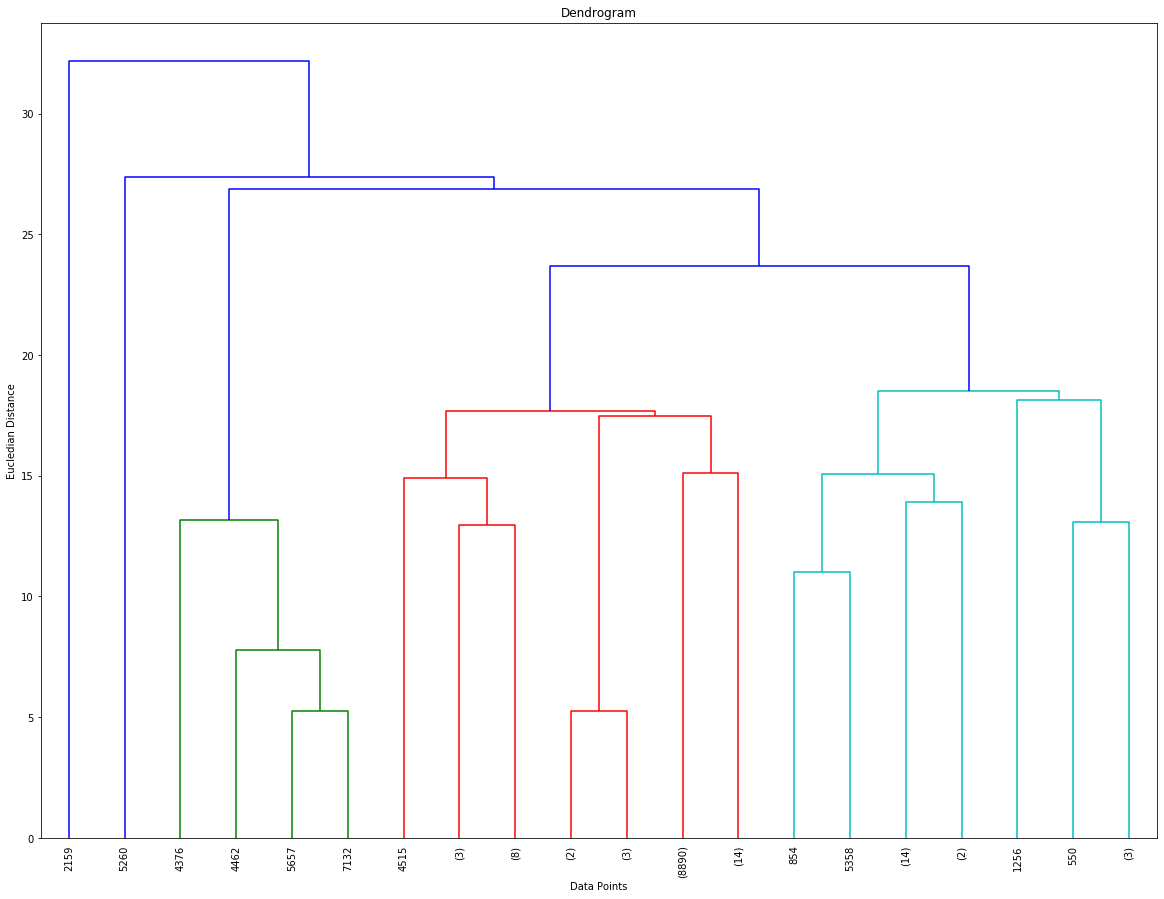

In [38]:
plt.figure(figsize=(20,15))
dendrogram(merg2,truncate_mode='level',leaf_rotation=90.0,leaf_font_size=10,p=6)
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Eucledian Distance')
plt.show()

In [39]:
from sklearn.cluster import AgglomerativeClustering
hie=AgglomerativeClustering(n_clusters=6,affinity='euclidean',linkage='ward')
pred=hie.fit_predict(df_new)

df_h=df.copy(deep=True)
df_h['labels']=pred

In [40]:
df_h.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  labels  
0   201.802084        139.509787          0.000000      12       1  
1  4103.032597       1072.340217          0.222222      12       2  
2   622.066742        627.284787          0.000000      12       1  
3     0.000000        312.343947          0.000000      12       5  
4   678.334763        244.791237          0.000000      12       1

In [41]:
df_h['labels'].value_counts()

1    2907
3    2581
2    1194
5    1186
4     782
0     300
Name: labels, dtype: int64

In [42]:
metrics.silhouette_score(df_new,pred)

0.15927727217610127

In [43]:
print('For KMeans :','\n',df_k['labels'].value_counts())
print('-'*30)
print('For Agglomerative Clustering :','\n',df_h['labels'].value_counts())
print('-'*30)

For KMeans : 
 3    3040
1    2229
5    1323
0    1311
2     965
4      82
Name: labels, dtype: int64
------------------------------
For Agglomerative Clustering : 
 1    2907
3    2581
2    1194
5    1186
4     782
0     300
Name: labels, dtype: int64
------------------------------


In [44]:
from sklearn.decomposition import PCA
model=PCA(n_components=17)
pca_val=model.fit_transform(df_new)
pca_val.shape

(8950, 17)

In [45]:
eigenvectors=model.components_

In [46]:
eigenvalues=model.explained_variance_

In [47]:
eigen_pairs = [(np.abs(eigenvalues[i]), eigenvectors[ :, i]) for i in range(len(eigenvalues))]
# eigen_pairs

In [48]:
eigen_pairs_sorted=sorted(eigen_pairs,reverse=True)
# eigen_pairs_sorted

In [49]:
tot = sum(eigenvalues)
var_exp = [( i /tot ) * 100 for i in sorted(eigenvalues, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 27.29767135  47.61145096  56.42463266  63.90415705  70.1288863
  75.86894275  80.75236831  85.05157155  88.84983025  91.92983252
  94.30208356  96.0754532   97.50331004  98.72022961  99.73289664
  99.99993148 100.        ]


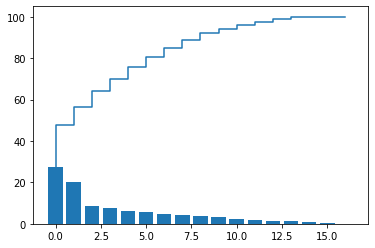

In [50]:
plt.bar(range(17),var_exp)
plt.step(range(17),cum_var_exp)

In [51]:
eigvalues_sort = [eigen_pairs_sorted[index][0] for index in range(len(eigenvalues))]
eigvectors_sort = [eigen_pairs_sorted[index][1] for index in range(len(eigenvalues))]

In [52]:
P_reduce = np.array(eigvectors_sort[0:9]).transpose()
# P_reduce

In [53]:
X_pca = np.dot(df_new,P_reduce)
X_pca.shape

(8950, 9)

In [54]:
from sklearn.cluster import KMeans
# Now we know our best k value is 3, I am creating a new kmeans model:
m1 = KMeans(n_clusters=6,n_init=15,random_state=2)
m1.fit(X_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=15, n_jobs=None, precompute_distances='auto',
       random_state=2, tol=0.0001, verbose=0)

In [55]:
centroids=m1.cluster_centers_
centroid_df = pd.DataFrame(centroids) # columns = list(X_std_df)
#centroid_df.columns=X.columns
centroid_df

0         1         2         3         4         5         6  \
0  1.576877 -0.334949  1.066087  1.088661  1.038771 -1.480893  0.236803   
1 -0.004591 -0.312230 -0.699112 -0.129703 -0.559498  0.384285  0.074416   
2 -0.550728  0.265367 -0.279567 -0.095450  0.187416  0.291743  1.140393   
3  1.620303 -2.322113  2.522077  2.641166  1.879536 -6.058852 -1.795699   
4 -0.502819  0.733022  0.028570  0.189082  0.635713  0.260897 -0.742188   
5 -0.368196 -0.076277  2.074859 -2.041521 -1.317345  0.091161 -0.013349   

          7         8  
0  0.888062  0.530343  
1  0.605380  0.415440  
2 -1.340563 -1.715544  
3 -0.832578 -2.675193  
4 -0.774773  0.002348  
5  0.014006  0.138279

In [56]:
m1.inertia_

41809.57642620129

In [57]:
metrics.silhouette_score(X_pca,m1.labels_)

0.28264426864861864

In [58]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

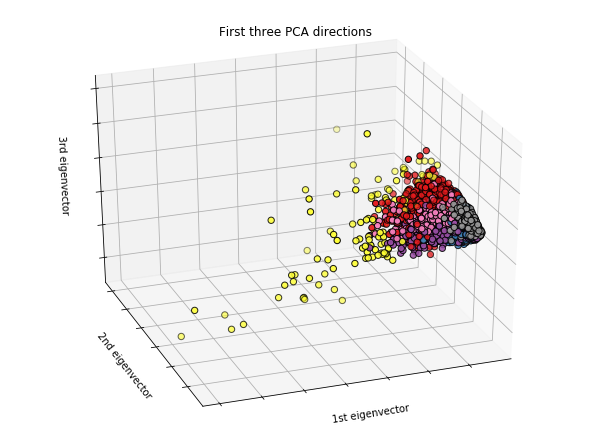

In [59]:
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(df_new)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1],X_reduced[:, 2], c=m1.labels_,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

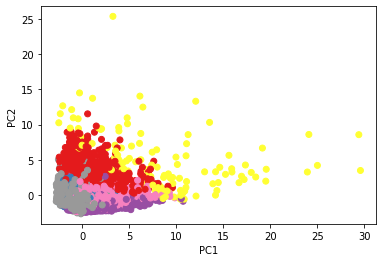

In [60]:
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=m1.labels_, cmap=plt.cm.Set1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [61]:
X_std_df_labeled = df_cust.copy(deep=True)
X_std_df_labeled['class'] = m1.labels_

In [62]:
AGC_clusters = X_std_df_labeled.groupby(['class'])
Df0=AGC_clusters.get_group(0)
Df1=AGC_clusters.get_group(1)
Df2=AGC_clusters.get_group(2)
Df3=AGC_clusters.get_group(3)
Df4=AGC_clusters.get_group(4)
Df5=AGC_clusters.get_group(5)

In [63]:
Df0.shape,Df1.shape,Df2.shape,Df3.shape,Df4.shape,Df5.shape

((1121, 19), (3760, 19), (1125, 19), (121, 19), (2159, 19), (664, 19))

In [64]:
Df0.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
1   C10002  3202.467416           0.909091       0.00              0.00   
15  C10016  6886.213231           1.000000    1611.70              0.00   
21  C10022  6369.531318           1.000000    6359.95           5910.04   
23  C10024  3800.151377           0.818182    4248.35           3454.56   
24  C10025  5368.571219           1.000000       0.00              0.00   

    INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
1                     0.00   6442.945483                  0.0   
15                 1611.70   2301.491267                  0.5   
21                  449.91    229.028245                  1.0   
23                  793.79   7974.415626                  1.0   
24                    0.00    798.949863                  0.0   

    ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
1                     0.000000                          0.000000   
15                    0.000000                          0.500000   
21                    0.916667                          1.000000   
23                    0.083333                          0.916667   
24                    0.000000                          0.000000   

    CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
1                 0.250000                 4              0        7000.0   
15                0.166667                 4             11        8000.0   
21                0.333333                 6             92       11250.0   
23                0.333333                13             13        9000.0   
24                0.363636                 4              0        6000.0   

       PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  class  
1   4103.032597       1072.340217          0.222222      12      0  
15  1993.439277       2109.906490          0.000000      12      0  
21  2077.959051       1659.775075          0.000000      12      0  
23  9479.043842       1425.426525          0.000000      12      0  
24  1422.726707       1657.002877          0.000000      11      0

In [65]:
Df1.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   
8  C10009  1014.926473           1.000000     861.49            661.49   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   
8                   200.0      0.000000             0.333333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   
8                    0.083333                          0.250000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   
8                0.000000                 0              5        7000.0   

     PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  class  
0  201.802084        139.509787               0.0      12      1  
2  622.066742        627.284787               0.0      12      1  
3    0.000000        312.343947               0.0      12      1  
4  678.334763        244.791237               0.0      12      1  
8  688.278568        311.963409               0.0      12      1

In [66]:
Df2.head()

CUST_ID     BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
6   C10007  627.260806           1.000000    7091.01           6402.63   
48  C10050  229.867179           1.000000    2390.60           1402.93   
83  C10087   42.464430           0.545455     396.00              0.00   
85  C10089  134.917202           1.000000    1247.80           1247.80   
98  C10103    4.708041           0.363636      79.00              0.00   

    INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
6                   688.38           0.0                 1.00   
48                  987.67           0.0                 1.00   
83                  396.00           0.0                 0.50   
85                    0.00           0.0                 1.00   
98                   79.00           0.0                 0.25   

    ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
6                     1.000000                          1.000000   
48                    0.666667                          1.000000   
83                    0.000000                          0.416667   
85                    1.000000                          0.000000   
98                    0.000000                          0.166667   

    CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
6                      0.0                 0             64       13500.0   
48                     0.0                 0             87        3300.0   
83                     0.0                 0             12        1200.0   
85                     0.0                 0             22       16500.0   
98                     0.0                 0              3        7000.0   

       PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  class  
6   6354.314328        198.065894          1.000000      12      2  
48  2543.953559        175.657825          0.916667      12      2  
83   725.606194        140.809454          1.000000      12      2  
85  1275.229436        171.357189          1.000000      12      2  
98   217.820198        121.781205          1.000000      12      2

In [67]:
Df3.head()

CUST_ID       BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
71   C10074   2990.422186           0.909091    4523.27           1664.09   
109  C10114   6644.201651           1.000000    4478.75           2721.59   
125  C10131   2392.917738           1.000000   12462.44          12462.44   
138  C10144  19043.138560           1.000000   22009.92           9449.07   
153  C10159  13673.079610           1.000000    9792.23           3959.81   

     INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
71                  2859.18  27296.485760             0.666667   
109                 1757.16   7205.520805             1.000000   
125                    0.00      0.000000             0.916667   
138                12560.85      0.000000             1.000000   
153                 5832.42   2444.445738             1.000000   

     ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
71                     0.500000                          0.583333   
109                    0.916667                          1.000000   
125                    0.916667                          0.000000   
138                    0.750000                          1.000000   
153                    0.750000                          1.000000   

     CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
71                 0.833333                27             33        7000.0   
109                0.583333                21             64        9000.0   
125                0.000000                 0            217        2800.0   
138                0.000000                 0            216       18000.0   
153                0.750000                26            216       20000.0   

        PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  class  
71   28232.69446       1107.030803          0.454545      12      3  
109  10857.94321       2469.571326          0.083333      12      3  
125  11628.71557       2000.990921          0.000000      12      3  
138  23018.57583      18621.013310          0.000000      12      3  
153  11717.30794       6042.391629          0.000000      12      3

In [68]:
Df4.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
5   C10006  1809.828751                1.0    1333.28              0.00   
7   C10008  1823.652743                1.0     436.20              0.00   
10  C10011  1293.124939                1.0     920.12              0.00   
12  C10013  1516.928620                1.0    3217.99           2500.23   
13  C10014   921.693369                1.0    2137.93            419.96   

    INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
5                  1333.28           0.0             0.666667   
7                   436.20           0.0             1.000000   
10                  920.12           0.0             1.000000   
12                  717.76           0.0             1.000000   
13                 1717.97           0.0             0.750000   

    ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
5                     0.000000                          0.583333   
7                     0.000000                          1.000000   
10                    0.000000                          1.000000   
12                    0.250000                          0.916667   
13                    0.166667                          0.750000   

    CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
5                      0.0                 0              8        1800.0   
7                      0.0                 0             12        2300.0   
10                     0.0                 0             12        1200.0   
12                     0.0                 0             26        3000.0   
13                     0.0                 0             26        7500.0   

       PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  class  
5   1400.057770       2407.246035          0.000000      12      4  
7    679.065082        532.033990          0.000000      12      4  
10  1083.301007       2172.697765          0.000000      12      4  
12   608.263689        490.207013          0.250000      12      4  
13  1655.891435        251.137986          0.083333      12      4

In [69]:
Df5.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
16  C10017  2072.074354           0.875000       0.00              0.00   
46  C10048   474.447149           0.500000     109.74              0.00   
53  C10055   464.674156           0.888889    1979.22           1979.22   
66  C10069   809.847455           0.875000       0.00              0.00   
72  C10075   656.013010           1.000000       0.00              0.00   

    INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
16                    0.00   2784.274703             0.000000   
46                  109.74   1013.659552             0.375000   
53                    0.00   1981.265503             0.666667   
66                    0.00    908.423608             0.000000   
72                    0.00   1474.349901             0.000000   

    ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
16                    0.000000                              0.00   
46                    0.000000                              0.25   
53                    0.666667                              0.00   
66                    0.000000                              0.00   
72                    0.000000                              0.00   

    CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
16                0.250000                 3              0        3000.0   
46                0.125000                 1              3        1700.0   
53                0.111111                 1             11        3000.0   
66                0.125000                 1              0        1500.0   
72                0.125000                 3              0        7000.0   

       PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  class  
16   391.974562        376.579631              0.00       8      5  
46   176.013005        147.199792              0.00       8      5  
53  3110.052742        132.446091              0.20       9      5  
66   146.074769        179.412493              0.00       8      5  
72   910.457985        140.983193              0.25       8      5